In [2]:
!pip install --user threadpoolctl==3.1.0

  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural           N  
1             1.0         Urban           Y  
2             1.0   

C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\ProgramData\Anaconda3\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\ProgramData\Anaconda3\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\Anaconda3\lib\subprocess.py", line 1311, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
C:\Users\A

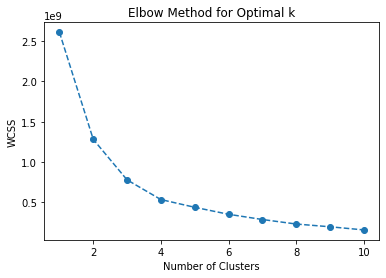

C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
<ipython-input-4-4d27906d6adb>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.fit_predict(X)


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area Loan_Status  Cluster  
0             1.0         Rural           N        2  
1             1.0         Urban           Y     

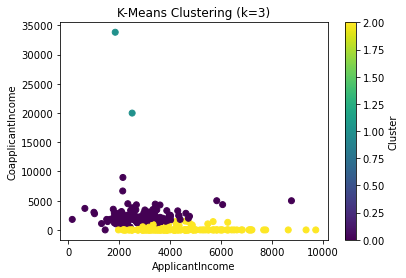

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv("clustering.csv")

# Display first few rows of the dataset
print(df.head())

# Drop missing values
df_cleaned = df.dropna()

# Selecting numerical columns for clustering
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns
print("Numerical columns used for clustering:", numerical_cols.tolist())

# Feature selection for clustering (Modify as needed)
X = df_cleaned[numerical_cols]

# Apply the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Trying different cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose optimal k (Modify based on the elbow plot observation)
k_optimal = 3  # Example choice, change based on your dataset

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df_cleaned['Cluster'] = kmeans.fit_predict(X)

# Display clustered data
print(df_cleaned.head())

# Plot the clusters (for 2D visualization, choose two relevant features)
plt.scatter(df_cleaned[numerical_cols[0]], df_cleaned[numerical_cols[1]], c=df_cleaned['Cluster'], cmap='viridis')
plt.xlabel(numerical_cols[0])
plt.ylabel(numerical_cols[1])
plt.title(f'K-Means Clustering (k={k_optimal})')
plt.colorbar(label='Cluster')
plt.show()
